In [1]:
#-- Importing all possibly nessesary liberaries --#
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import statistics
from scipy.stats import f_oneway
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df =pd.read_csv('/Users/lindasegalini/Desktop/WGU/New Program/Data Exporation/medical_clean.csv')


# Conducting chi-square between readmission and overweight¶

In [3]:
#--Creating a new dataframe for chi-sqaure to analyis of readmission and overweight patients--#
df_chi = pd.crosstab(index =df['ReAdmis'],
                       columns = df['Overweight']) 

df_chi.columns =['No','Yes',]
df_chi.index = ['Overweight','ReAdmitted']
df_chi

,No,Yes
Overweight,1821,4510
ReAdmitted,1085,2584


In [4]:
#-- Calling chi-square function with the new dataframe--#
#--Conducting chi-square test for independence--#
stat, p, dof, expected = chi2_contingency(df_chi)
#--Displaying the degrees of freedom--#
print("degrees of freedom =", dof)
print()
print("Expected = ",expected)
print()
# --Displaying the pvalue --#
print('P-value = ', p)
#--interpreting the test-statistic--#
prob =0.95
critical = chi2.ppf(prob, dof)
print( 'Alpha level =',prob ,'Critical Value =',critical, 'Test statistic =',stat)

if abs(stat) >= critical:
    print('Dependent(reject H0)')
else:
    print('Independent (fail to reject H0)')

#-- Interperating the p-value --#

alpha = 1.0 - prob
print('significance = ', alpha, p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

degrees of freedom = 1

Expected =  [[1839.7886 4491.2114]
 [1066.2114 2602.7886]]

P-value =  0.4032948387365497
Alpha level = 0.95 Critical Value = 3.841458820694124 Test statistic = 0.6984802059617877
Independent (fail to reject H0)
significance =  0.050000000000000044 0.4032948387365497
Independent (fail to reject H0)


# Conducting univariate analysis 

In [5]:
#-- creating a new dataframe for uni variate analysis 
unidf = pd.DataFrame(df[['Income', 'Children']])
unidf 

,Income,Children
0,86575.93,1
1,46805.99,3
2,14370.14,3
3,39741.49,0
4,1209.56,1
...,...,...
9995,45967.61,2
9996,14983.02,4
9997,65917.81,3
9998,29702.32,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdae80f6c70>,
      dtype=object)

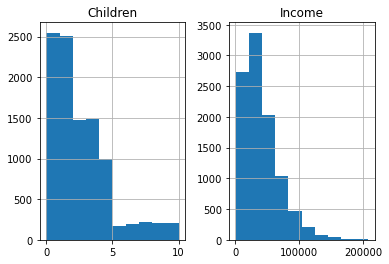

In [6]:
#-- writing code to display a histogram and revieling the distrobutions of the selected univariate variables
unidf.hist()

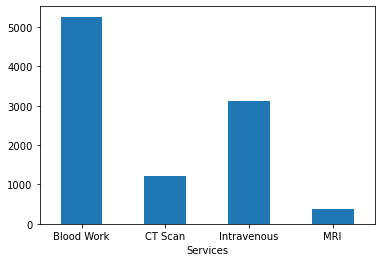

In [8]:
#--Displaying the univariate distrobution of Services
 
df.groupby('Services').size().plot.bar(rot=0)
plt.show()

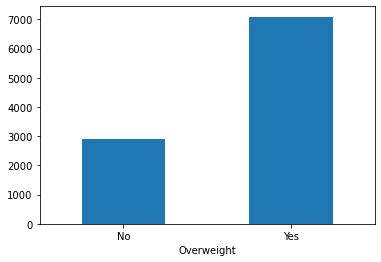

In [9]:
#-- Showing the univariate distrution of Overweight pateints--#
df.groupby('Overweight').size().plot.bar(rot=0)
plt.show()

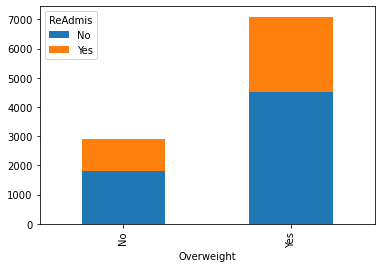

In [10]:
#--Bivarite analysis between Overwieght vs. readmission --#

tbl = pd.pivot_table(df.groupby(['Overweight', 'ReAdmis']).size().reset_index(),
                     values =0,
                     index='Overweight',
                     columns =['ReAdmis'],
                     aggfunc =np.sum)
                     
tbl.plot(kind='bar', stacked =True)

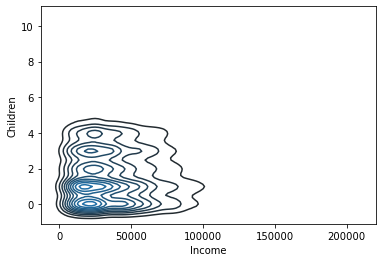

In [12]:
 #--Dislaying the bivartiate distrobution between children and income with kernal density estimation--#

sns.kdeplot(df.Income, df.Children)              
                     